<p style="color:black; font-style:italic;font-size:18px;">
En este proyecto utilizaré el Excel con datos creados para poder calcular el sueldo total y los años trabajados, limpiando los datos repetidos. Luego realizaré distintos gráficos con el fin de mostrar la capacidad de visualizar datos lógicamente relacionados.
</p>

In [1]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import Limpieza


In [2]:
enero = pd.read_excel('Datos.xlsx',sheet_name='Enero')
febrero = pd.read_excel('Datos.xlsx',sheet_name='Febrero')
marzo = pd.read_excel('Datos.xlsx',sheet_name='Marzo')
ingreso = pd.read_excel('Datos.xlsx',sheet_name='Base')
df = pd.concat([enero,febrero,marzo], ignore_index = True)
di = pd.concat([ingreso,ingreso,ingreso], ignore_index = True)
df['Mes'] = pd.to_datetime(df['Mes'], dayfirst=True)

In [3]:
df = Limpieza.limpieza_datos(df)
df = Limpieza.conversión_sueldos(df)

In [4]:
df['Cálculo de Bono'] = df['Sueldo Base']*df['Bono %']
df['Cálculo de Bono'] = df['Cálculo de Bono'].round().astype(int)
df['Sueldo Total'] = df['Sueldo Base']+df['Cálculo de Bono']
df["Fecha de Ingreso"] = di["Fecha de Ingreso"]
df["Años Trabajados"]=((df["Mes"]-df["Fecha de Ingreso"])/pd.Timedelta(days=365.25)).round(1)
df['Meses'] = df['Mes'].dt.strftime('%B')

In [5]:
df

,Mes,ID,Nombre,Departamento,Evaluación,Sueldo Base,Bono %,Cálculo de Bono,Sueldo Total,Fecha de Ingreso,Años Trabajados,Meses
0,2025-05-31,1.0,Ramón Soto,Operaciones,C,560000,0.08,44800,604800,2020-02-14,5.3,May
1,2025-05-31,2.0,Ema Martinez,Servicio al Cliente,B,740000,0.05,37000,777000,2022-09-22,2.7,May
2,2025-05-31,3.0,Clara Rivas,Legal,D,800000,0.07,56000,856000,2015-06-02,10.0,May
3,2025-05-31,4.0,Pedro Escribar,Relaciones Públicas,C,850000,0.04,34000,884000,2018-10-09,6.6,May
4,2025-05-31,5.0,Jaime Ortega,Servicio al Cliente,E,780000,0.07,54600,834600,2023-12-13,1.5,May
5,2025-05-31,6.0,Camila Molina,Operaciones,D,600000,0.06,36000,636000,2016-07-23,8.9,May
6,2025-05-31,7.0,Ernesto Vidal,Investigación,D,900000,0.10,90000,990000,2021-05-17,4.0,May
7,2025-05-31,8.0,Ana Díaz,Legal,B,550000,0.13,71500,621500,2021-05-19,4.0,May
8,2025-05-31,9.0,Andrea Gallardo,Servicio al Cliente,D,1200000,0.07,84000,1284000,2019-08-14,5.8,May
9,2025-05-31,10.0,Camilo Santillana,Relaciones Públicas,D,1000000,0.07,70000,1070000,2020-02-07,5.3,May


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
palette = sns.color_palette("tab20")
style = sns.set_style("whitegrid")

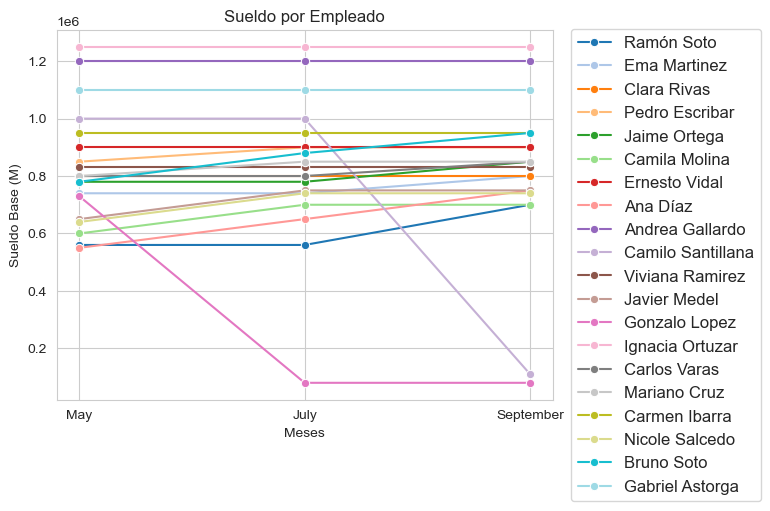

In [8]:
sns.lineplot(data=df, x="Meses", y="Sueldo Base", hue="Nombre", marker="o", palette=palette, style=style)
plt.title("Sueldo por Empleado")

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.025), fontsize=12,frameon=True)
plt.ylabel("Sueldo Base (M)")
plt.show()

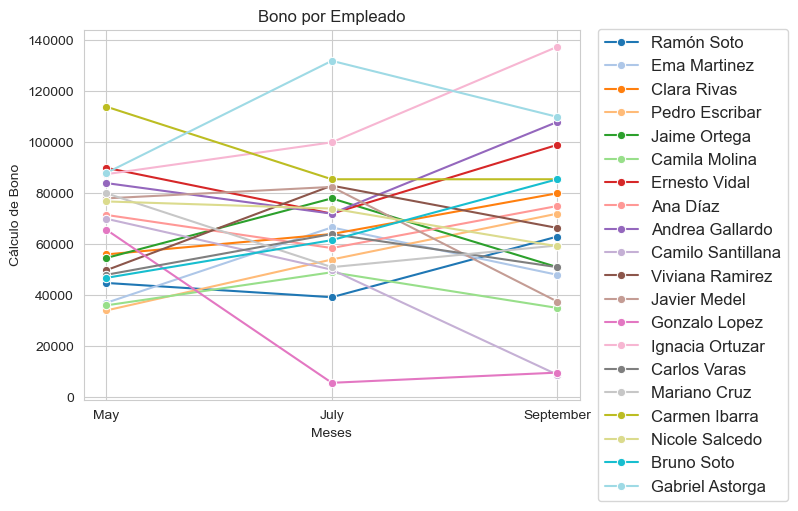

In [9]:
sns.lineplot(data=df, x="Meses", y="Cálculo de Bono", hue="Nombre", marker="o", palette=palette, style=style)
plt.title("Bono por Empleado")

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.025), fontsize=12,frameon=True)
plt.show()

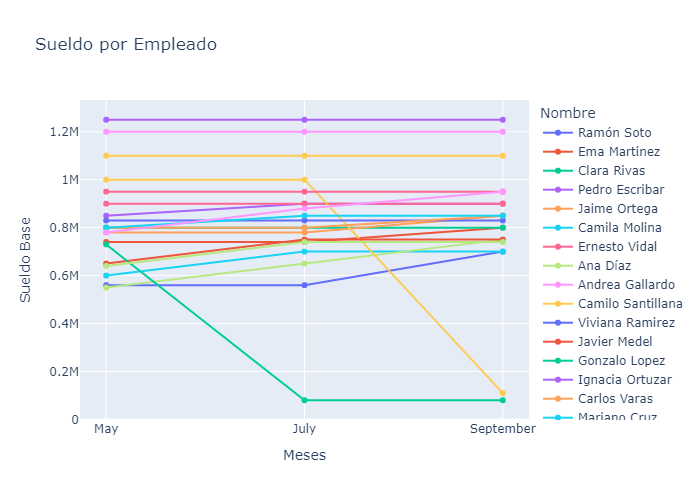

In [25]:
fig = px.line(df, x="Meses", y="Sueldo Base", color="Nombre", markers=True,
              title="Sueldo por Empleado")
fig.show(renderer="png")

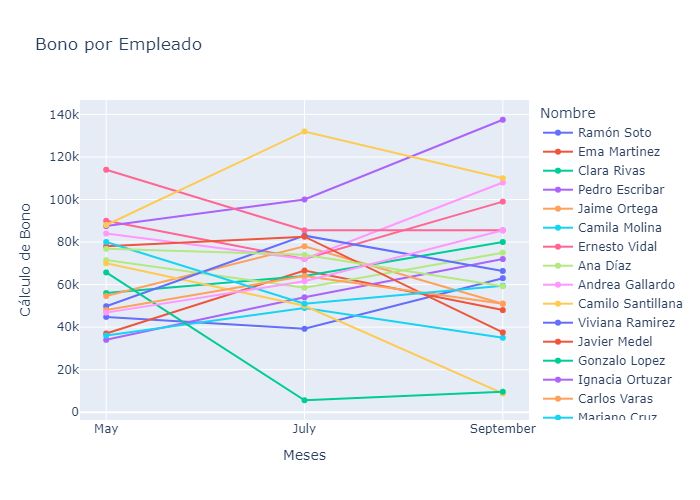

In [11]:
fig = px.line(df, x="Meses", y="Cálculo de Bono", color="Nombre", markers=True,
              title="Bono por Empleado")
fig.show(renderer="png")

In [12]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

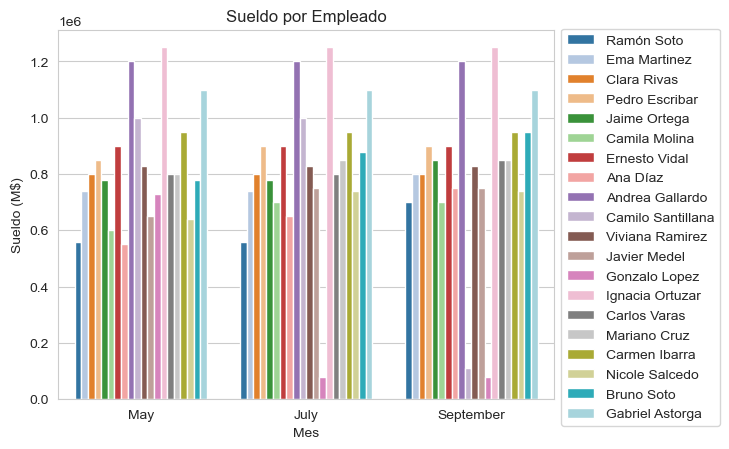

In [13]:
sns.barplot(data=df, x="Meses", y="Sueldo Base", hue="Nombre", palette=palette)
plt.title("Sueldo por Empleado") 
plt.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.465)
)
plt.xlabel("Mes")
plt.ylabel("Sueldo (M$)")
plt.show()

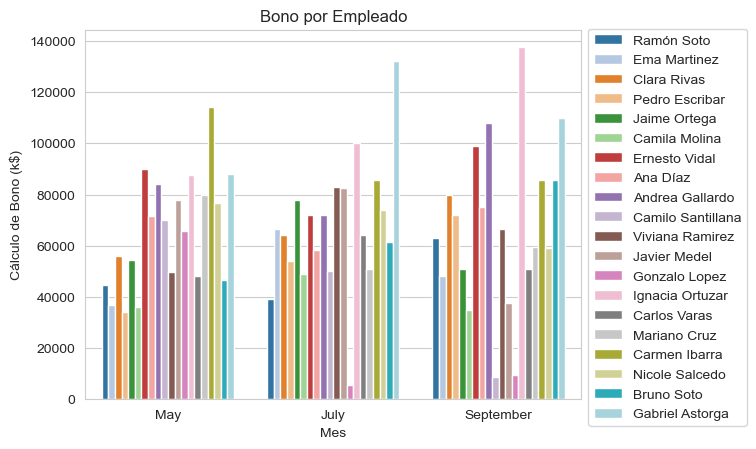

In [14]:
sns.barplot(data=df, x="Meses", y="Cálculo de Bono", hue="Nombre", palette=palette)
plt.title("Bono por Empleado") 
plt.legend(loc="center left",bbox_to_anchor=(1, 0.465))
plt.xlabel("Mes")
plt.ylabel("Cálculo de Bono (k$)")
plt.show()

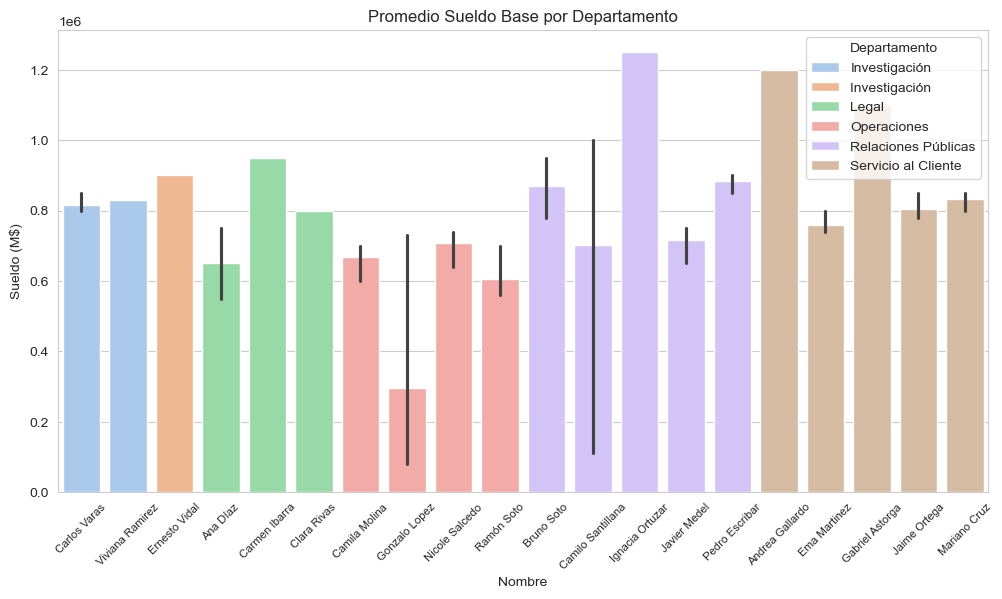

In [15]:
df_sorted = df.sort_values(['Departamento', 'Nombre'])
plt.figure(figsize=(12,6))
sns.barplot(data=df_sorted, x='Nombre', y='Sueldo Base', hue='Departamento', dodge=False)
plt.xticks(rotation=45, fontsize=8.2)
plt.title(f"Promedio Sueldo Base por Departamento")
plt.ylabel("Sueldo (M$)")
plt.show()

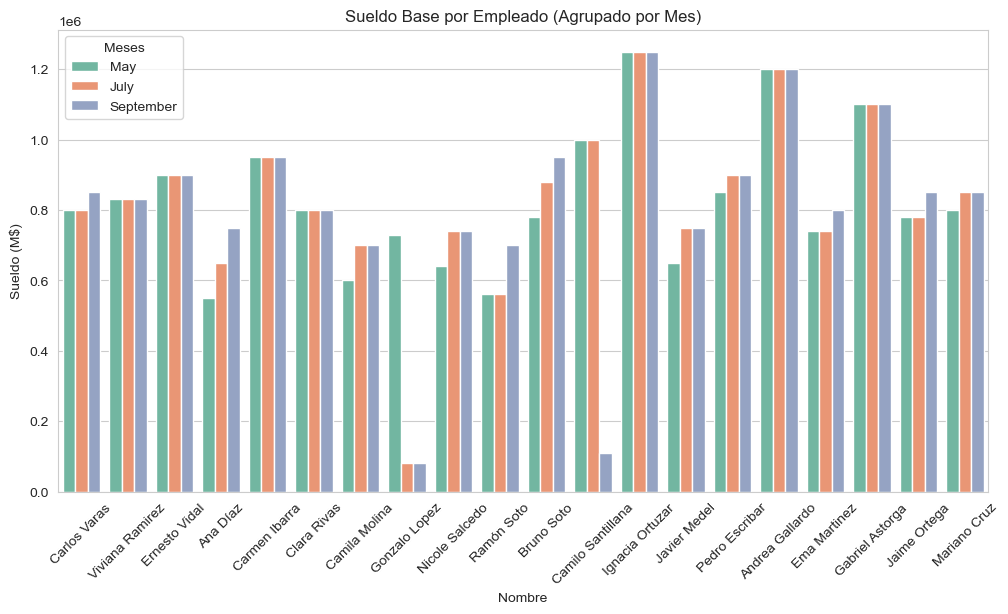

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_sorted,
    x='Nombre',
    y='Sueldo Base',
    hue='Meses',        # <- el color ahora representa cada Mes
    dodge=True,       # <- barras separadas por Mes          # <- sin líneas negras de error
    palette="Set2"
)
plt.xticks(rotation=45)
plt.ylabel("Sueldo (M$)")
plt.title("Sueldo Base por Empleado (Agrupado por Mes)")
plt.show()

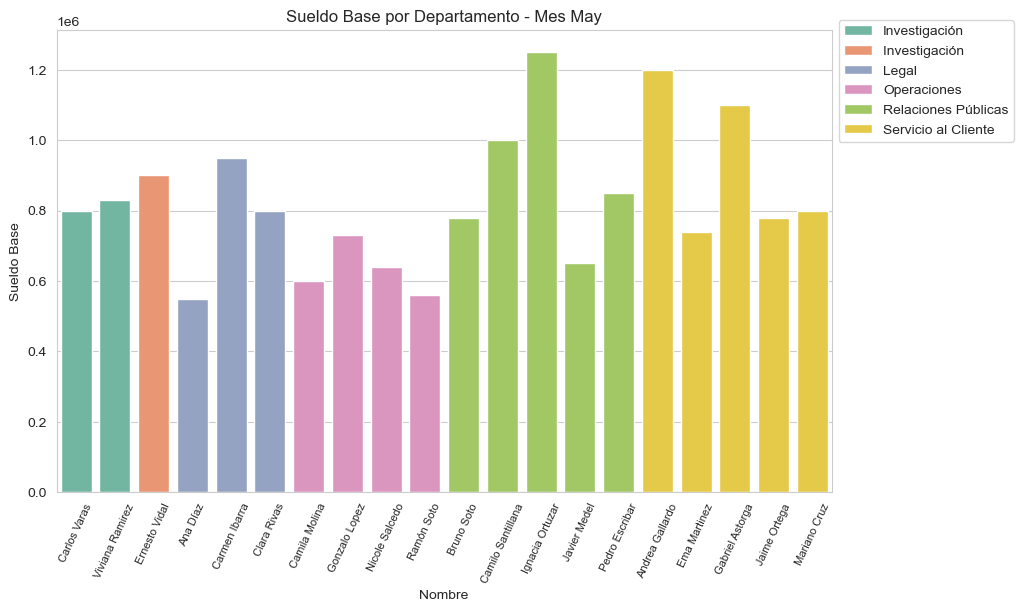

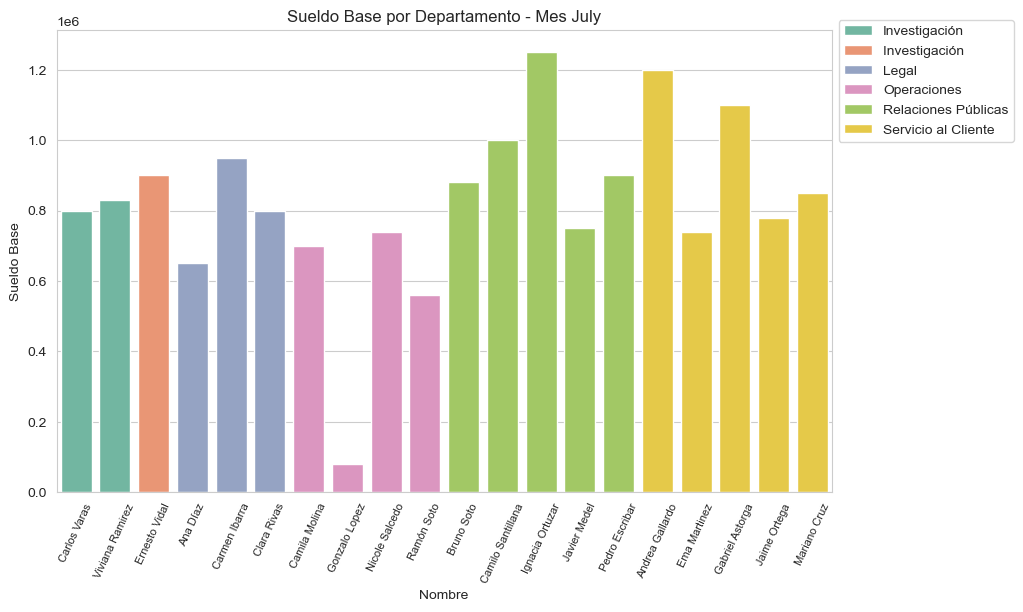

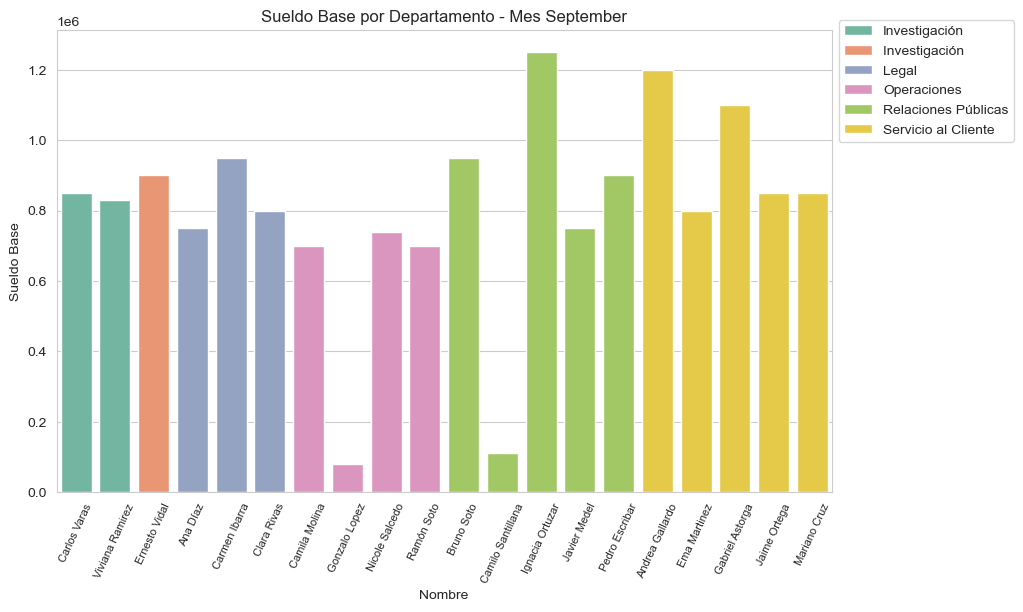

In [17]:
meses = df_sorted["Meses"].unique()
for mes in meses:
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_sorted[df_sorted["Meses"] == mes],
        x="Nombre",
        y="Sueldo Base",
        hue="Departamento",
        estimator="mean",   # promedio
        palette="Set2"
    )
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.89))
    plt.xticks(rotation=65,fontsize=8)
    plt.title(f"Sueldo Base por Departamento - Mes {mes}")
    plt.show()


In [18]:
orden_eval = ["A", "B","C","D", "E"]
# Reordenar el dataframe por Evaluación y luego por Nombre
df_sorted_2 = df.sort_values(["Evaluación", "Nombre"], key=lambda col: 
                           col.map({v: i for i, v in enumerate(orden_eval)}) 
                           if col.name=="Evaluación" else col)

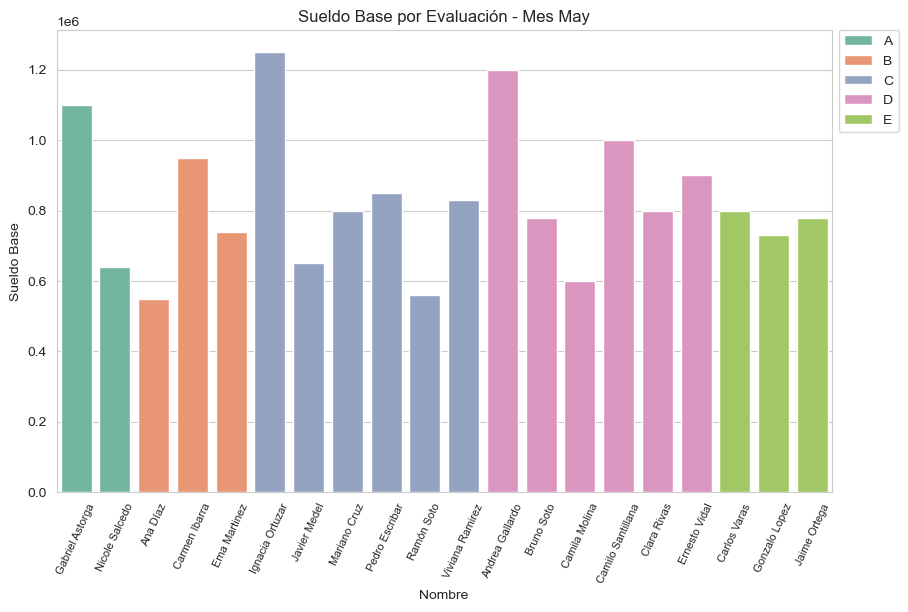

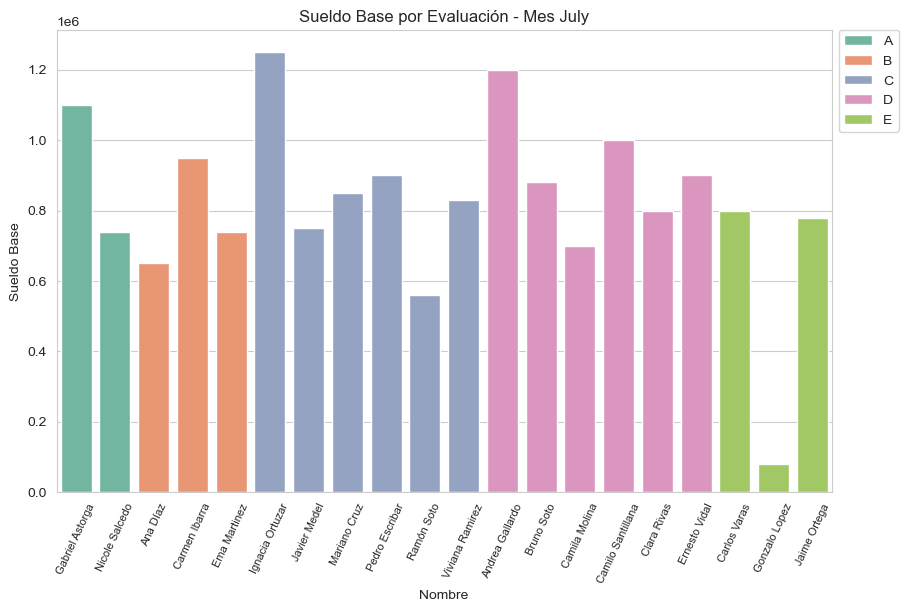

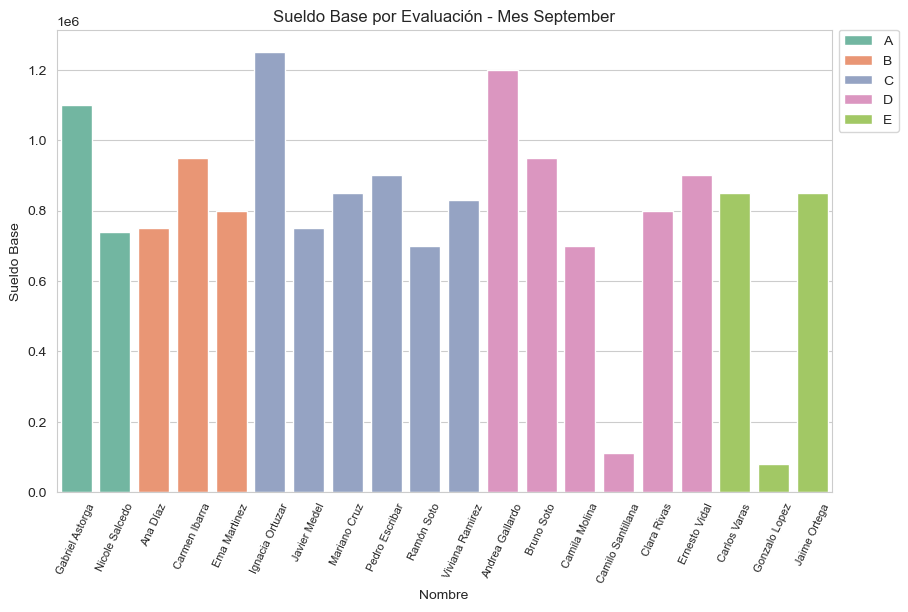

In [19]:
for mes in meses:
    plt.figure(figsize=(10,6))
    sns.barplot(
    data=df_sorted_2[df_sorted_2["Meses"] == mes],
    x="Nombre",
    y="Sueldo Base",
    hue="Evaluación",
    hue_order=orden_eval,         # <- aquí aplicas el orden
    palette="Set2"
)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.89))
    plt.xticks(rotation=65,fontsize=8)
    plt.title(f"Sueldo Base por Evaluación - Mes {mes}")
    plt.show()

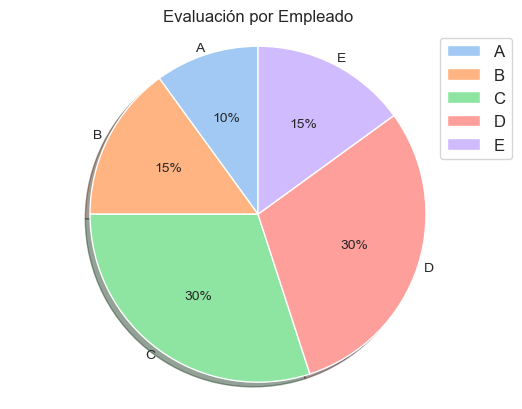

In [20]:
frecuencias = df['Evaluación'].value_counts().sort_index()
plt.pie(
    frecuencias, 
    labels=frecuencias.index, 
    autopct='%1.0f%%',  # porcentaje con un decimal
    startangle=90,       # gira la torta para que empiece en vertical
    shadow=True,
    explode = [0,0,0,0,0],
    labeldistance=1.04
)

plt.legend(loc='upper left', bbox_to_anchor=(0.85, 1), fontsize=12,frameon=True)
plt.title("Evaluación por Empleado")
plt.axis('equal')  # para que la torta sea circular
plt.show()

In [21]:
df_sorted_3=df_sorted.sort_values(['Nombre','Años Trabajados'])
orden_antiguedad = df_sorted_3['Nombre'].unique()

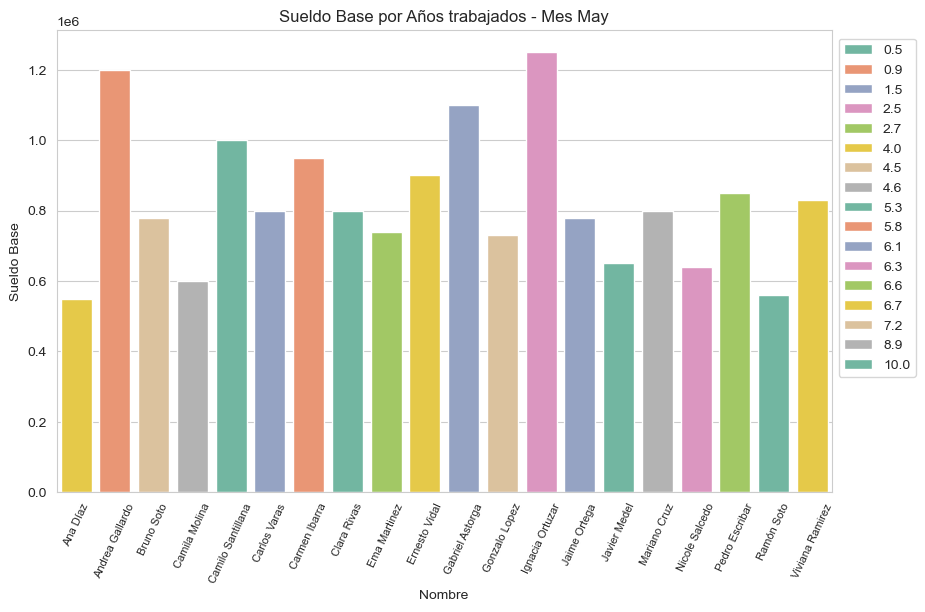

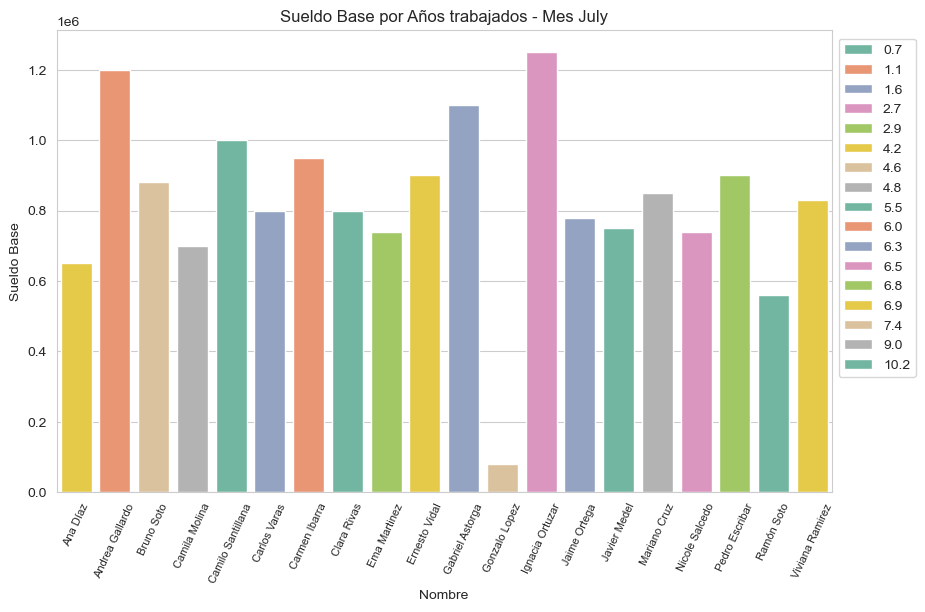

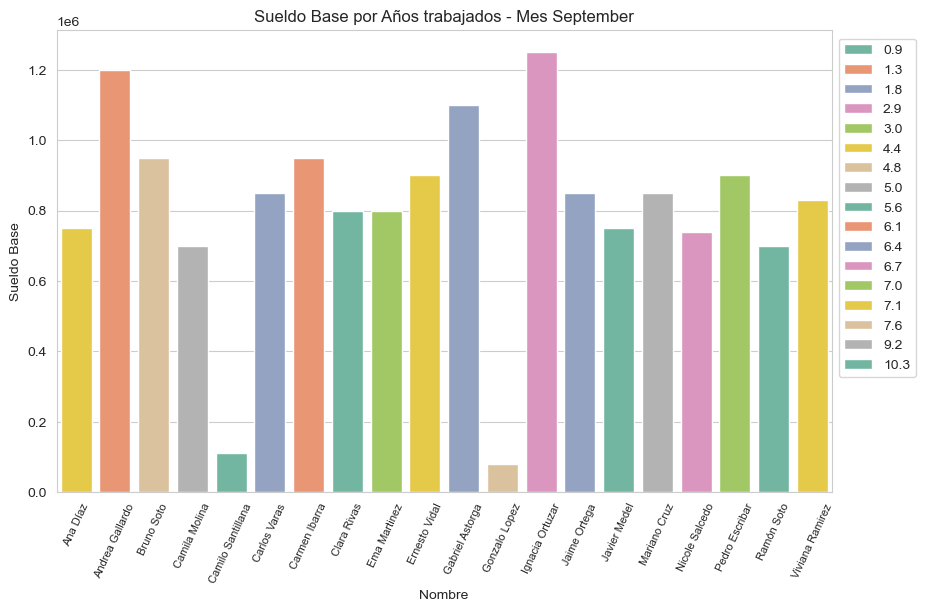

In [22]:
for mes in meses:
        plt.figure(figsize=(10,6))
        sns.barplot(
            data=df_sorted_3[df_sorted_3['Meses']==mes],
            x="Nombre",
            y="Sueldo Base",
            hue="Años Trabajados",
            estimator="mean",   # promedio
            palette="Set2",
            order=orden_antiguedad
        )
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.615))
        plt.xticks(rotation=65,fontsize=8)
        plt.title(f"Sueldo Base por Años trabajados - Mes {mes}")
        plt.show()

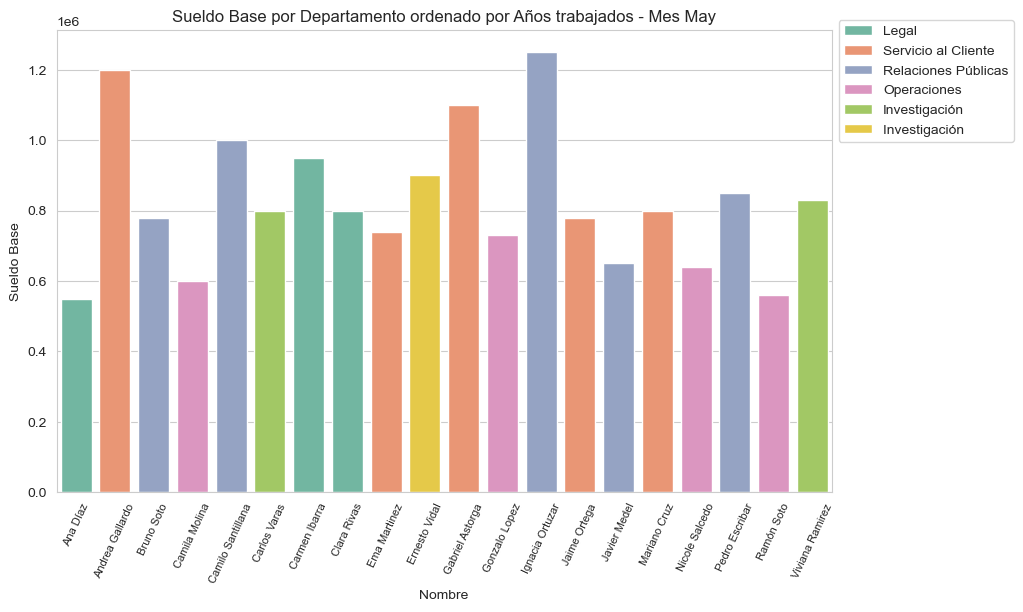

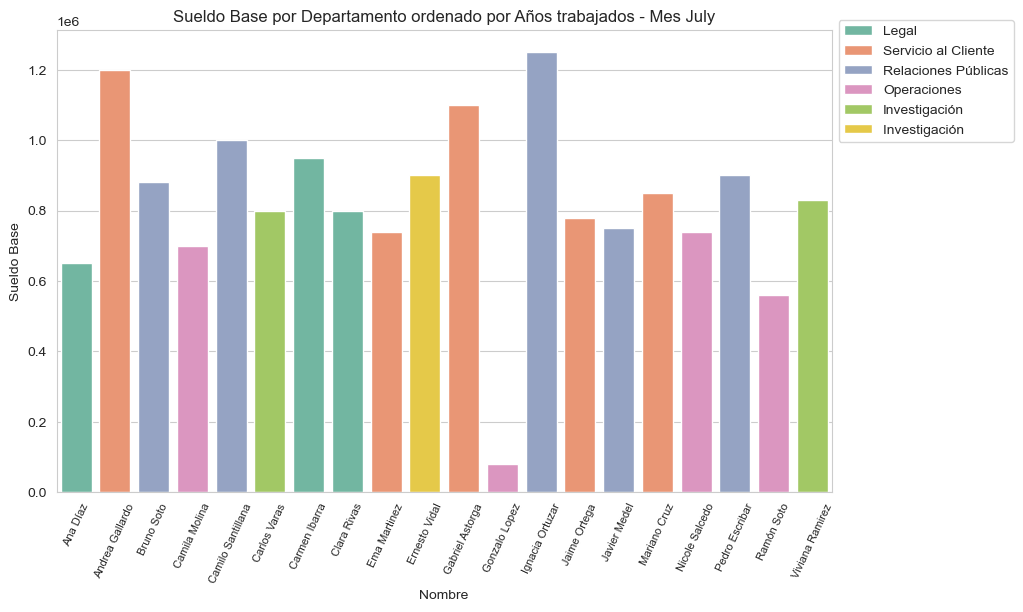

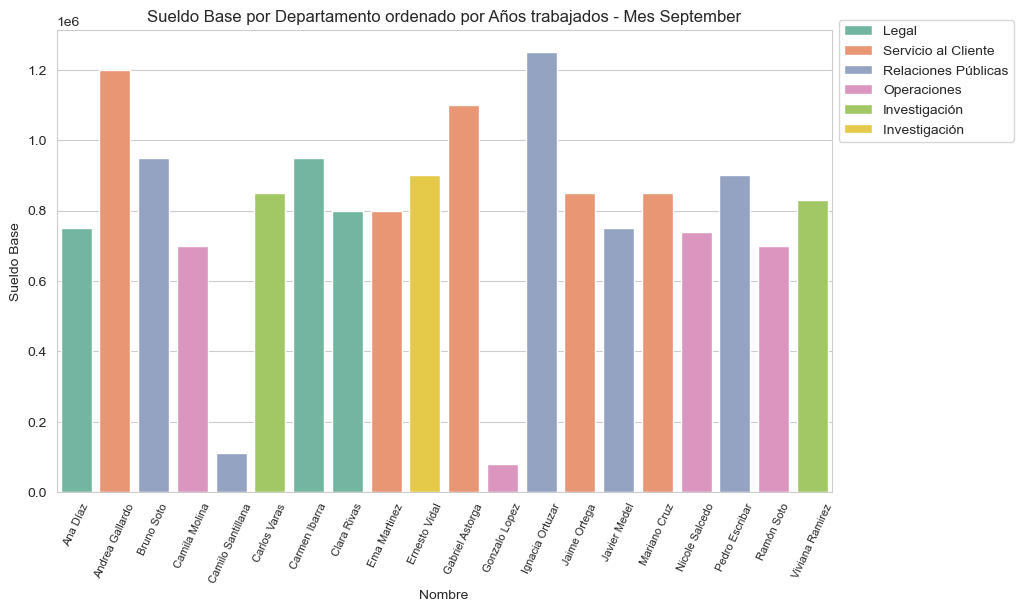

In [23]:
for mes in meses:
        plt.figure(figsize=(10,6))
        sns.barplot(
            data=df_sorted_3[df_sorted_3['Meses']==mes],
            x="Nombre",
            y="Sueldo Base",
            hue="Departamento",
            estimator="mean",   # promedio
            palette="Set2",
            order=orden_antiguedad
        )
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.89))
        plt.xticks(rotation=65,fontsize=8)
        plt.title(f"Sueldo Base por Departamento ordenado por Años trabajados - Mes {mes}")
        plt.show()

<p style="color:black; font-style:italic;font-size:18px;text_align:justify;">
Al ser datos ficticios sin orden ni lógica, no realizaré un análisis al respecto.